In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chats1/chats.csv


In [2]:
df=pd.read_csv('../input/chats1/chats.csv')
df.head(15)

,stage_name,first_name,last_name,email,content,sent_at
0,Lambda λ,Harish,Uthayakumar,harish.uthayakumar@zuddl.com,hi gopal,2022-06-13T15:55:15Z
1,Lambda λ,Gopalakrishnan,M,gopal.krishnan@zuddl.com,Hi,2022-06-13T15:55:45Z
2,Lambda λ,Harish,Uthayakumar,harish.uthayakumar@zuddl.com,lkjhg,2022-06-13T16:12:01Z
3,Lambda λ,Harish,Uthayakumar,harish.uthayakumar@zuddl.com,kjhgf,2022-06-13T16:12:16Z
4,Lambda λ,Saatvik,Koul,saatvik@analyticsvidhya.com,Am I audible?,2022-06-17T18:17:50Z
5,Lambda λ,Sunny,Koul,sunny@analyticsvidhya.com,hi,2022-06-17T18:18:13Z
6,Lambda λ,Sunny,Koul,sunny@analyticsvidhya.com,hi,2022-06-17T18:20:55Z
7,Lambda λ,Gopalakrishnan,M,gopal.krishnan@zuddl.com,H,2022-06-17T18:28:22Z
8,Lambda λ,Sunny,Koul,sunny@analyticsvidhya.com,h,2022-06-17T18:28:30Z
9,Lambda λ,Sunny,Koul,sunny@analyticsvidhya.com,jkkj,2022-06-17T18:28:37Z


In [3]:
df.shape

(6200, 6)

In [4]:
from wordcloud import WordCloud
import nltk


In [5]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re
import seaborn as sns
from nltk.corpus import stopwords




In [6]:
top_N = 100


a = df['content'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)

In [7]:
 c=b.split()


In [8]:
#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

word_tokens = c
filtered_tok = [w for w in word_tokens if not w in stop_words]
filtered_tok = []
for w in word_tokens:
    if w not in stop_words:
        filtered_tok.append(w)
        
filtered_tok

['hi',
 'gopal',
 'hi',
 'lkjhg',
 'kjhgf',
 'audible',
 'hi',
 'hi',
 'h',
 'h',
 'jkkj',
 'h',
 'jkkj',
 'hi',
 'sorry',
 'guys',
 'internet',
 'dropped',
 'hi',
 'kavea',
 'hi',
 'shivani',
 'divecha',
 'gmail',
 'com',
 'yogesh',
 'hear',
 'u',
 'please',
 'refresh',
 'browser',
 'hi',
 'u',
 'hear',
 'yes',
 'yes',
 'hi',
 'hi',
 'hi',
 'sure',
 'dry',
 'run',
 'done',
 'right',
 'hi',
 'sunil',
 'hi',
 'hi',
 'hi',
 'hi',
 'hi',
 'wassup',
 'hi',
 'testing',
 'hey',
 'ssup',
 'testing',
 'helloo',
 'hello',
 'akshay',
 'truefoundry',
 'com',
 'akshay',
 'siroya',
 'https',
 'prnt',
 'sc',
 'kvgoncskrxsn',
 'yes',
 'lambda',
 'dry',
 'run',
 'anurag',
 'akshay',
 'hello',
 'checking',
 'hello',
 'everyone',
 'access',
 'app',
 'truefoundry',
 'com',
 'pin',
 'last',
 'message',
 'princychoudhary',
 'zuddl',
 'com',
 'unable',
 'hear',
 'anything',
 'hello',
 'unable',
 'see',
 'anything',
 'hi',
 'hear',
 'anything',
 'hi',
 'audio',
 'hi',
 'hi',
 'yogesh',
 'hi',
 'hi',
 'hi',
 

In [9]:
import matplotlib.pyplot as plt

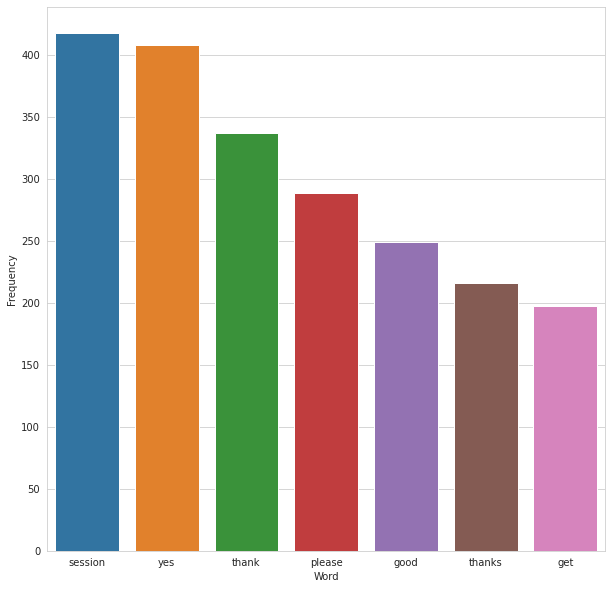

In [10]:
# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_tok if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]

# Calculate frequency distribution
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

In [11]:
def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

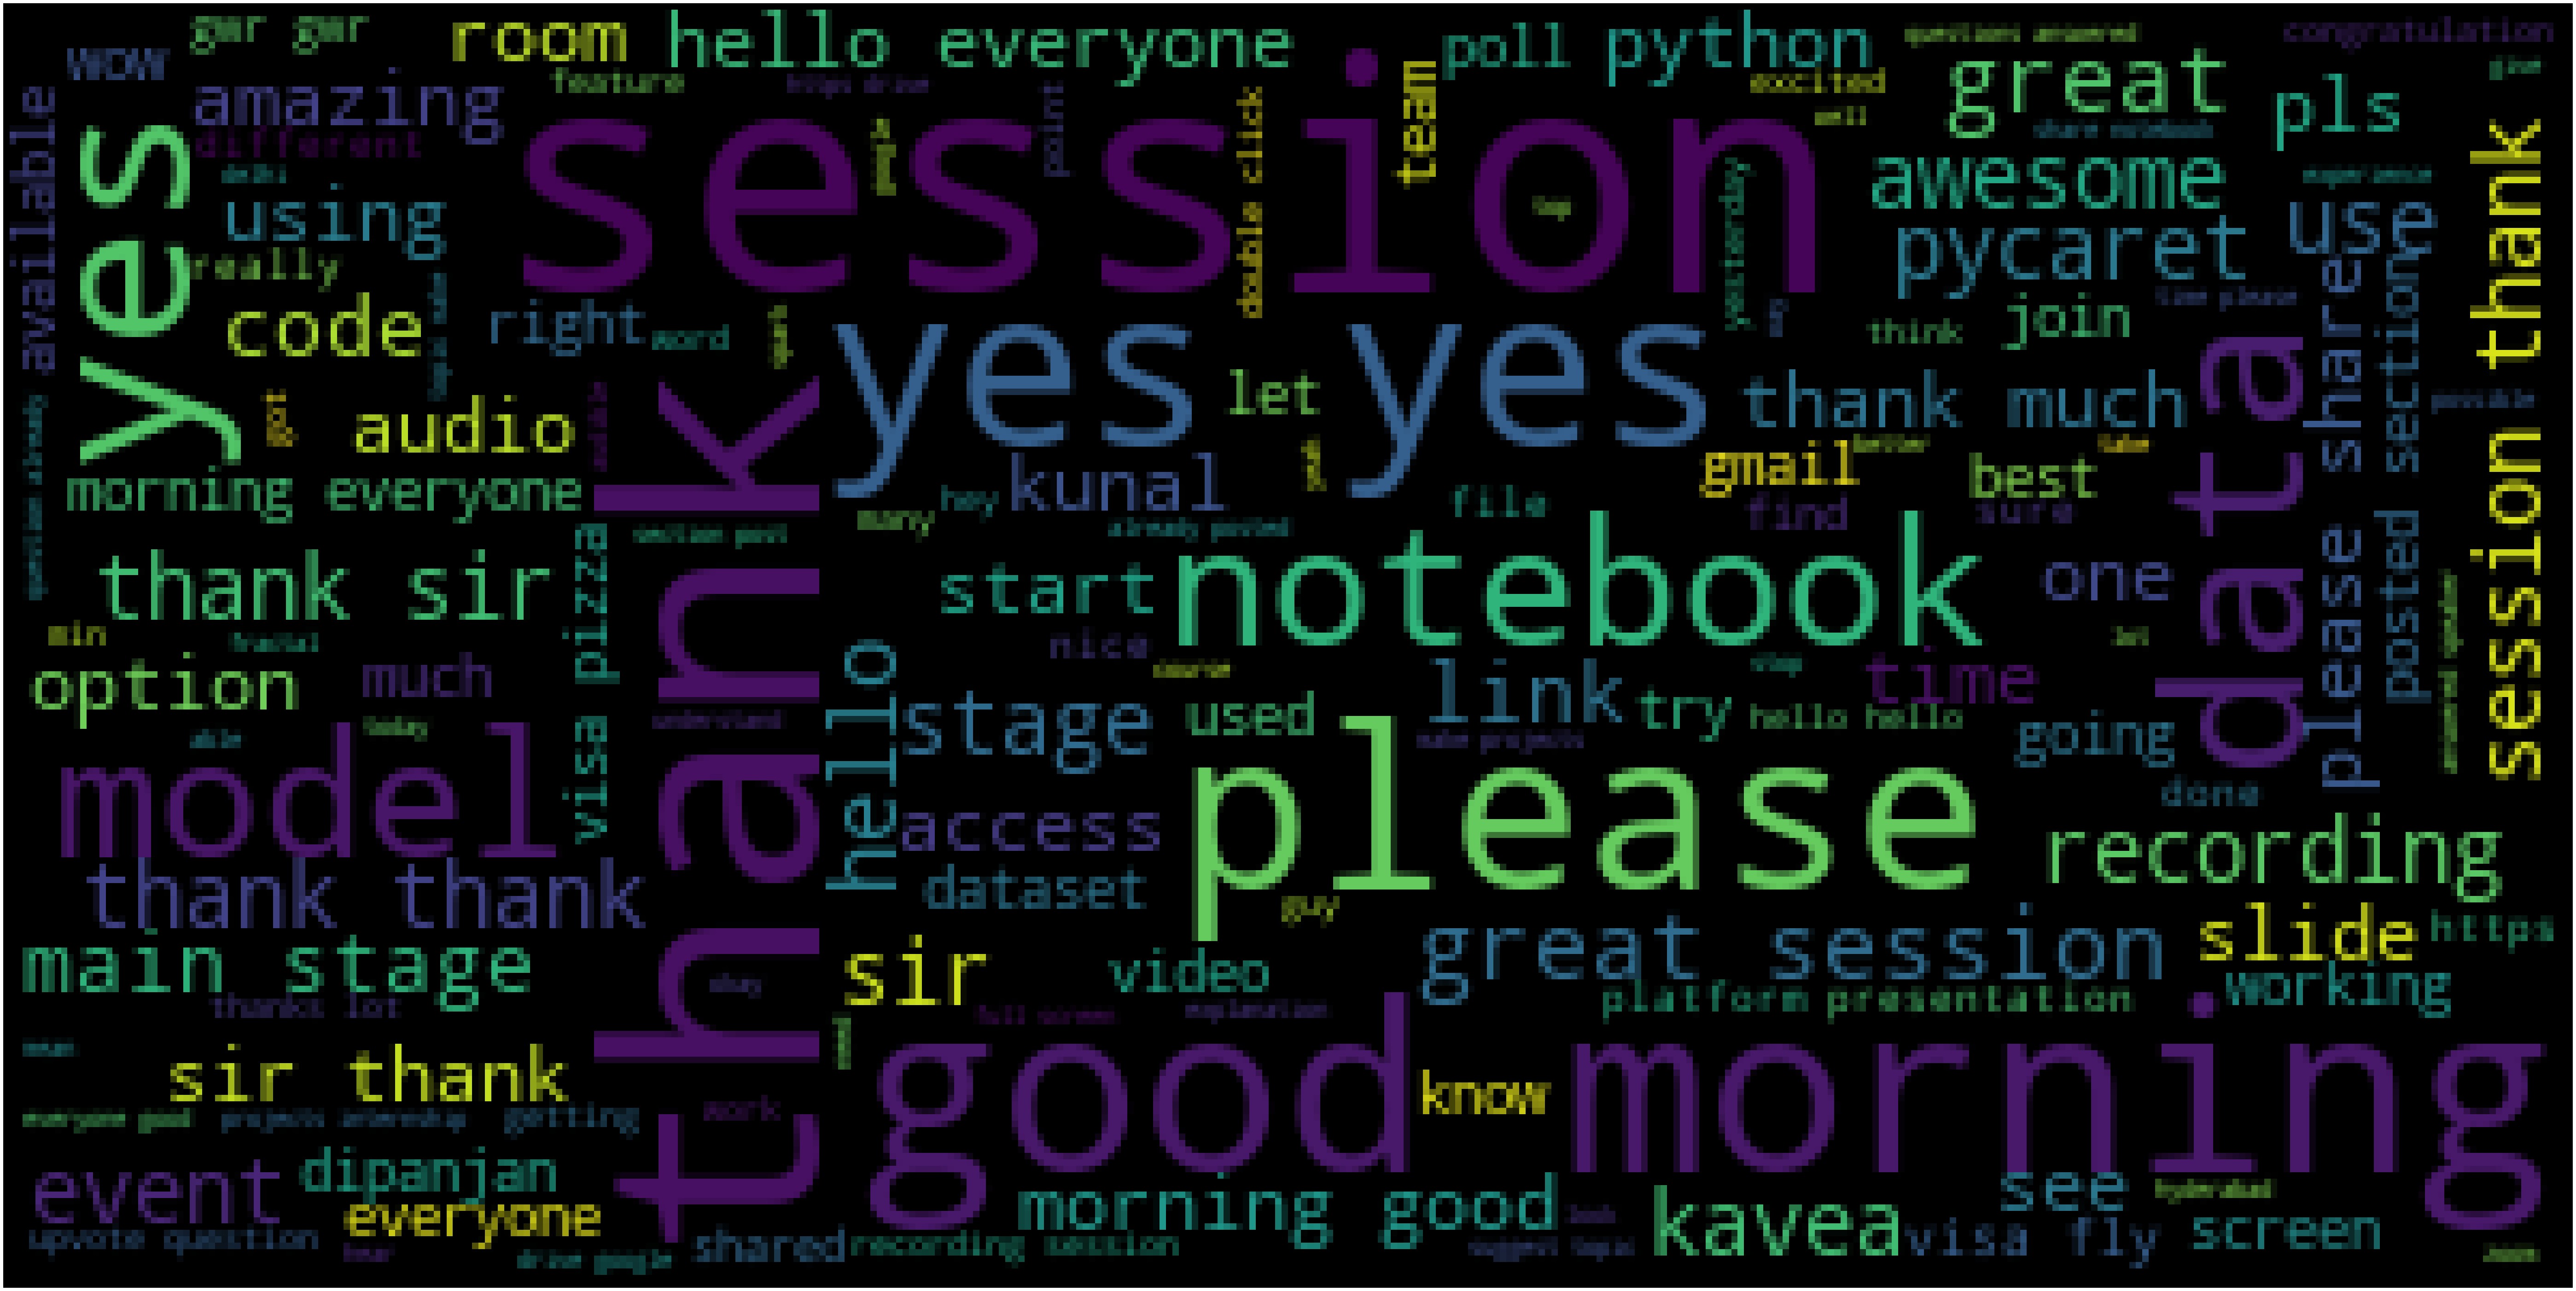

In [12]:
wc(cleaned_data_title,'black','Common Words' )

In [13]:


#VADER  Approach
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [14]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
 
def classify_compound(text, threshold=0.33):
     
    # initialize VADER
    sid = SentimentIntensityAnalyzer()
     
    # Calling the polarity_scores method on sid and passing in the text
    # outputs a dictionary with negative, neutral, positive, and compound scores for the input text
    scores = sid.polarity_scores(text)
     
    # get compound score
    score = scores['compound']
     
    # translate the score into the correcponding input according to the threshold
    if score <= -threshold: return 'Negative'
    elif score<= threshold: return 'Positive'
    else: return 'Neutral'

/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [15]:
df['compound_sentiment'] = df.content.apply(lambda text: classify_compound(text))

In [16]:
positive_count=df[df.compound_sentiment=="Positive"]["compound_sentiment"].count()
neutral_count=df[df.compound_sentiment=="Neutral"]["compound_sentiment"].count()

In [17]:
total_reviews=df.shape[0]

In [18]:
percentage_positive = (positive_count/total_reviews)*100
percentage_neutral = (neutral_count/total_reviews)*100

In [19]:
percentage_positive

65.01612903225806

In [20]:

percentage_neutral

33.61290322580645

In [21]:
#using roberta module
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [22]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Downloading:   0%|          | 0.00/747 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/476M [00:00<?, ?B/s]

In [23]:
# Run for Roberta Model
for i  in range(0,6200):
    
    example=df['content'][i]
    tokens = nltk.word_tokenize(example)

    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
              'roberta_neg' : scores[0],
              'roberta_neu' : scores[1],
              'roberta_pos' : scores[2]
           }
    print(scores_dict)

{'roberta_neg': 0.21359302, 'roberta_neu': 0.5834406, 'roberta_pos': 0.2029665}
{'roberta_neg': 0.13280782, 'roberta_neu': 0.56343377, 'roberta_pos': 0.3037584}
{'roberta_neg': 0.24311304, 'roberta_neu': 0.5656737, 'roberta_pos': 0.19121309}
{'roberta_neg': 0.26398766, 'roberta_neu': 0.5597532, 'roberta_pos': 0.17625909}
{'roberta_neg': 0.2164428, 'roberta_neu': 0.72584254, 'roberta_pos': 0.0577146}
{'roberta_neg': 0.20451176, 'roberta_neu': 0.5521486, 'roberta_pos': 0.24333969}
{'roberta_neg': 0.20451176, 'roberta_neu': 0.5521486, 'roberta_pos': 0.24333969}
{'roberta_neg': 0.23128228, 'roberta_neu': 0.53642964, 'roberta_pos': 0.232288}
{'roberta_neg': 0.29254663, 'roberta_neu': 0.511756, 'roberta_pos': 0.1956974}
{'roberta_neg': 0.23311974, 'roberta_neu': 0.61802113, 'roberta_pos': 0.14885914}
{'roberta_neg': 0.29254663, 'roberta_neu': 0.511756, 'roberta_pos': 0.1956974}
{'roberta_neg': 0.23311974, 'roberta_neu': 0.61802113, 'roberta_pos': 0.14885914}
{'roberta_neg': 0.1663551, 'rober

In [24]:
labels=[]
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    labels.append("positive" if max(scores)==scores[2] else "neutral" if max(scores)==scores[1] else "neagative")
    return scores_dict,labels


In [25]:
for i  in range(0,6200):
    
    example=df['content'][i]
    #tokens = nltk.word_tokenize(example)
    dff,label=polarity_scores_roberta(example)
    print(dff)

{'roberta_neg': 0.21359302, 'roberta_neu': 0.5834406, 'roberta_pos': 0.2029665}
{'roberta_neg': 0.13280782, 'roberta_neu': 0.56343377, 'roberta_pos': 0.3037584}
{'roberta_neg': 0.24311304, 'roberta_neu': 0.5656737, 'roberta_pos': 0.19121309}
{'roberta_neg': 0.26398766, 'roberta_neu': 0.5597532, 'roberta_pos': 0.17625909}
{'roberta_neg': 0.2164428, 'roberta_neu': 0.72584254, 'roberta_pos': 0.0577146}
{'roberta_neg': 0.20451176, 'roberta_neu': 0.5521486, 'roberta_pos': 0.24333969}
{'roberta_neg': 0.20451176, 'roberta_neu': 0.5521486, 'roberta_pos': 0.24333969}
{'roberta_neg': 0.23128228, 'roberta_neu': 0.53642964, 'roberta_pos': 0.232288}
{'roberta_neg': 0.29254663, 'roberta_neu': 0.511756, 'roberta_pos': 0.1956974}
{'roberta_neg': 0.23311974, 'roberta_neu': 0.61802113, 'roberta_pos': 0.14885914}
{'roberta_neg': 0.29254663, 'roberta_neu': 0.511756, 'roberta_pos': 0.1956974}
{'roberta_neg': 0.23311974, 'roberta_neu': 0.61802113, 'roberta_pos': 0.14885914}
{'roberta_neg': 0.1663551, 'rober

In [26]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

In [27]:
sentiments=[]
for i  in range(0,6200):
    
    example=df['content'][i]
    #tokens = nltk.word_tokenize(example)

    sentiments.append(sent_pipeline(example)[0]['label'])

In [28]:
sentiments

['POSITIVE',
 'POSITIVE',
 'NEGATIVE',
 'NEGATIVE',
 'NEGATIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'NEGATIVE',
 'NEGATIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'NEGATIVE',
 'NEGATIVE',
 'NEGATIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'NEGATIVE',
 'NEGATIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'NEGATIVE',
 'NEGATIVE',
 'NEGATIVE',
 'NEGATIVE',
 'NEGATIVE',
 'POSITIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'POSITIVE',